# ML pipeline for the multilabel classification task (Challange 2)
Developed by Pablo BETANCUR and Aron GIMESI

*For the whole history of experiments and utility classes and functions, visit the GitHub repository at*
https://github.com/gimesia/CADx-Project


In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, cohen_kappa_score, accuracy_score, classification_report

from utils.loader import FactoryLoader
from utils.ml import MLPipeline
from utils.preprocessing import PreprocessingFactory
from utils.feature_extraction import *
from utils.utils import *

VAL_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\val"
TRAIN_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\train"
TEST_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\test"

In [2]:
percent = 100
random = False
batch_size = 24
th = 0.01

# Initialize the FactoryLoader
factory = PreprocessingFactory()
factory.pad2square(fill=np.nan)
factory.resize((200,200))
factory.normalize2float()

# Create the feature extraction pipeline strategy and add desired features
strategy = FeatureExtractionStrategy()

strategy.add_extractor(GradientExtractor(threshold=th)) # Add gradient feature

strategy.add_extractor(ColorMomentsExtractor("rgb", threshold=th))   # Add color moments feature
strategy.add_extractor(ColorMomentsExtractor("lab", threshold=th))   # Add color moments feature
strategy.add_extractor(ColorMomentsExtractor("hsv", threshold=th))   # Add color moments feature

strategy.add_extractor(LBPExtractor(radius=1, n_points=8))
strategy.add_extractor(LBPExtractor(radius=2, n_points=16))
strategy.add_extractor(LBPExtractor(radius=3, n_points=24))
strategy.add_extractor(LBPExtractor(radius=4, n_points=32))
strategy.add_extractor(LBPExtractor(radius=5, n_points=40))

strategy.add_extractor(FourierTransformExtractor())
strategy.add_extractor(FFTExtractor())

strategy.add_extractor(GLCMExtractor(properties=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']))

pipeline = MLPipeline(dataset_path=TRAIN_PATH, preprocessing_factory=factory, feature_strategy=strategy, classifiers=[], percentage=percent, verbose=True, shuffle=random, batch_size=batch_size)

INFO:utils.ml:MLPipeline initialized with dataset path: C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\train
INFO:utils.ml:Preprocessing steps


In [3]:
pipeline.feature_matrix = None
pipeline.run_feature_extraction()

INFO:utils.ml:Running feature extraction...


Processed 5/212 batches.
Processed 10/212 batches.
Processed 15/212 batches.
Processed 20/212 batches.
Processed 25/212 batches.
Processed 30/212 batches.
Processed 35/212 batches.
Processed 40/212 batches.
Processed 45/212 batches.
Processed 50/212 batches.
Processed 55/212 batches.
Processed 60/212 batches.
Processed 65/212 batches.
Processed 70/212 batches.
Processed 75/212 batches.
Processed 80/212 batches.
Processed 85/212 batches.
Processed 90/212 batches.
Processed 95/212 batches.
Processed 100/212 batches.
Processed 105/212 batches.
Processed 110/212 batches.
Processed 115/212 batches.
Processed 120/212 batches.
Processed 125/212 batches.
Processed 130/212 batches.
Processed 135/212 batches.
Processed 140/212 batches.
Processed 145/212 batches.
Processed 150/212 batches.
Processed 155/212 batches.
Processed 160/212 batches.
Processed 165/212 batches.
Processed 170/212 batches.
Processed 175/212 batches.
Processed 180/212 batches.
Processed 185/212 batches.
Processed 190/212 bat

INFO:utils.ml:Feature extraction completed. Extracted 5082 features.


Processed 212/212 batches.


In [5]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

xgb0 = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=7, min_child_weight=3, subsample=0.7, colsample_bytree=0.7)
xgb1 = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=5, min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8)
xgb2 = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1)
xgb3 = XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8) # THIS!!
xgb4 = XGBClassifier(learning_rate=0.1, n_estimators=500, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
xgb5 = XGBClassifier(learning_rate=0.1, n_estimators=750, max_depth=7, min_child_weight=3, subsample=0.7, colsample_bytree=0.7)
xgb6 = XGBClassifier(learning_rate=0.1, n_estimators=750, max_depth=5, min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8) # THIS
xgb7 = XGBClassifier(learning_rate=0.1, n_estimators=750, max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1) # THIS
xgb8 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=7, min_child_weight=3, subsample=0.7, colsample_bytree=0.7)
xgb9 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8)
xgb10 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1) # this
xgb11 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
xgb12 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=9, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
xgb13 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=5, gamma=0.2, subsample=0.8, colsample_bytree=0.8)
xgb14 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1)
xgb15 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=7, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)
xgb16 = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=9, min_child_weight=1, subsample=0.8, colsample_bytree=0.8)

CLFS = [xgb0, xgb1, xgb2, xgb3, xgb4, xgb5, xgb6, xgb7, xgb8, xgb9, xgb10, xgb11, xgb12, xgb13, xgb14, xgb15, xgb16]

pipeline.classifiers = CLFS.copy()
pipeline.fitted_classifiers = {}

___
# Balance the data

In [6]:
# Backup
pipeline.backup_feature_matrix = pipeline.feature_matrix.copy()
pipeline.backup_labels = pipeline.labels.copy()

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

pipeline.feature_matrix, pipeline.labels = smote.fit_resample(np.nan_to_num(pipeline.feature_matrix), pipeline.labels)

In [8]:
print(pipeline.backup_feature_matrix.shape)
print(pipeline.feature_matrix.shape)

print(pipeline.backup_labels.shape)
print(pipeline.labels.shape)

(5082, 519)
(8139, 519)
(5082,)
(8139,)


In [9]:
pipeline.fitted_classifiers = {}
pipeline.classifiers = CLFS.copy()
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: XGBClassifier0
INFO:utils.ml:Top 10 features for XGBClassifier0: [('color_moments_rgb_B_iqr', 0.027694887), ('color_moments_lab_L_iqr', 0.017617349), ('color_moments_lab_B_var', 0.010725688), ('fft_radial_variance_53', 0.0070006726), ('lbp_rad1_bins8_4', 0.006842836), ('fft_radial_variance_19', 0.0068394733), ('color_moments_hsv_H_median', 0.006804766), ('color_moments_rgb_B_var', 0.006408653), ('fft_high_freq_energy', 0.0063838223), ('color_moments_lab_B_std', 0.0061635687)]
INFO:utils.ml:Fitted classifier: XGBClassifier0; Done in 64.39511275291443 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier1
INFO:utils.ml:Top 10 features for XGBClassifier1: [('color_moments_rgb_B_iqr', 0.029252732), ('color_moments_lab_L_iqr', 0.018102674), ('fft_radial_mean_92', 0.012822518), ('fft_radial_variance_91', 0.012702556), ('color_moments_lab_B_var', 0.010444425), ('fft_radial_variance_28', 0.009813966), ('lbp_rad4_bins32_6'

In [10]:
pipeline.predict_with_classifiers(VAL_PATH, percent)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\val


Processed 5/53 batches.
Processed 10/53 batches.
Processed 15/53 batches.
Processed 20/53 batches.
Processed 25/53 batches.
Processed 30/53 batches.
Processed 35/53 batches.
Processed 40/53 batches.
Processed 45/53 batches.
Processed 50/53 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier0
INFO:utils.ml:Predictions made with classifier: XGBClassifier1
INFO:utils.ml:Predictions made with classifier: XGBClassifier2
INFO:utils.ml:Predictions made with classifier: XGBClassifier3
INFO:utils.ml:Predictions made with classifier: XGBClassifier4
INFO:utils.ml:Predictions made with classifier: XGBClassifier5
INFO:utils.ml:Predictions made with classifier: XGBClassifier6
INFO:utils.ml:Predictions made with classifier: XGBClassifier7
INFO:utils.ml:Predictions made with classifier: XGBClassifier8
INFO:utils.ml:Predictions made with classifier: XGBClassifier9
INFO:utils.ml:Predictions made with classifier: XGBClassifier10
INFO:utils.ml:Predictions made with classifier: XGBClassifier11
INFO:utils.ml:Predictions made with classifier: XGBClassifier12


Processed 53/53 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier13
INFO:utils.ml:Predictions made with classifier: XGBClassifier14
INFO:utils.ml:Predictions made with classifier: XGBClassifier15
INFO:utils.ml:Predictions made with classifier: XGBClassifier16


{'GT': array([0, 0, 0, ..., 2, 2, 2]),
 'XGBClassifier0': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier1': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier2': array([0, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier3': array([0, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier4': array([0, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier5': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier6': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier7': array([0, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier8': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier9': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier10': array([0, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier11': array([0, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier12': array([0, 0, 2, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier13': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier14': array([0, 0, 2, ..., 1, 2, 0], dtype=int6

In [11]:
import pandas as pd

smote_classifiers = pipeline.fitted_classifiers.copy()
smote_predictions = pipeline.predictions.copy()

df_smote = pd.DataFrame(data=pipeline.calculate_metrics())
df_smote = df_smote.T
df_smote

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'kappa': 1.0}
INFO:utils.ml:Metrics for classifier XGBClassifier0: {'accuracy': 0.8771653543307086, 'precision': 0.7851080132258205, 'recall': 0.7743026332405503, 'f1': 0.7794268266389786, 'kappa': 0.7779640654138574}
INFO:utils.ml:Metrics for classifier XGBClassifier1: {'accuracy': 0.8740157480314961, 'precision': 0.7836436139111725, 'recall': 0.7752128201502426, 'f1': 0.7792100598423314, 'kappa': 0.7727862312034279}
INFO:utils.ml:Metrics for classifier XGBClassifier2: {'accuracy': 0.8803149606299212, 'precision': 0.7952996666205242, 'recall': 0.78379973165744, 'f1': 0.7891138002689159, 'kappa': 0.7841256776825494}
INFO:utils.ml:Metrics for classifier XGBClassifier3: {'accuracy': 0.8842519685039371, 'precision': 0.804822140527382, 'recall': 0.7948882078240785, 'f1': 0.7996358195033691, 'kappa': 0.7910370579307195}
INFO:utils.ml:Metrics for classifier XGBClassifier4: {'accuracy': 0.88

accuracy  precision    recall        f1     kappa
GT               1.000000   1.000000  1.000000  1.000000  1.000000
XGBClassifier0   0.877165   0.785108  0.774303  0.779427  0.777964
XGBClassifier1   0.874016   0.783644  0.775213  0.779210  0.772786
XGBClassifier2   0.880315   0.795300  0.783800  0.789114  0.784126
XGBClassifier3   0.884252   0.804822  0.794888  0.799636  0.791037
XGBClassifier4   0.881102   0.799390  0.789689  0.794324  0.785351
XGBClassifier5   0.877953   0.790637  0.778026  0.783958  0.779332
XGBClassifier6   0.874803   0.782622  0.772650  0.777352  0.774013
XGBClassifier7   0.887402   0.807889  0.791279  0.798954  0.796314
XGBClassifier8   0.877165   0.790130  0.774480  0.781713  0.777707
XGBClassifier9   0.875591   0.784796  0.773319  0.778675  0.775378
XGBClassifier10  0.888976   0.813134  0.792795  0.802020  0.799021
XGBClassifier11  0.883465   0.808506  0.791698  0.799454  0.789277
XGBClassifier12  0.875591   0.785532  0.773497  0.779148  0.775152
XGBClassifier13  0.875591   0.784796  0.773319  0.778675  0.775378
XGBClassifier14  0.888976   0.813134  0.792795  0.802020  0.799021
XGBClassifier15  0.883465   0.808506  0.791698  0.799454  0.789277
XGBClassifier16  0.875591   0.785532  0.773497  0.779148  0.775152

In [22]:
# BEST

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
highest = df_smote[df_smote["kappa"] == df_smote.iloc[1:]["kappa"].max()]
idx = highest.index[0]

confusion_matrix(pipeline.predictions["GT"], pipeline.predictions[idx])

array([[442,  32,  24],
       [ 37, 631,  10],
       [ 31,  11,  52]], dtype=int64)

___
# Borderline SMOTE

In [13]:
from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

pipeline.feature_matrix, pipeline.labels = smote.fit_resample(pipeline.backup_feature_matrix, pipeline.backup_labels)

print(pipeline.backup_feature_matrix.shape)
print(pipeline.feature_matrix.shape)

print(pipeline.backup_labels.shape)
print(pipeline.labels.shape)

(5082, 519)
(8139, 519)
(5082,)
(8139,)


In [14]:
pipeline.fitted_classifiers = {}
pipeline.classifiers = CLFS.copy()
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: XGBClassifier0
INFO:utils.ml:Top 10 features for XGBClassifier0: [('color_moments_rgb_B_iqr', 0.029166298), ('color_moments_lab_L_iqr', 0.015084127), ('fft_radial_mean_121', 0.010826645), ('color_moments_lab_B_var', 0.010617831), ('fft_radial_mean_126', 0.009657436), ('fft_radial_mean_38', 0.008333238), ('fft_radial_variance_83', 0.00769103), ('color_moments_lab_A_iqr', 0.007254932), ('fft_radial_mean_75', 0.0072412686), ('fft_radial_variance_19', 0.0070487214)]
INFO:utils.ml:Fitted classifier: XGBClassifier0; Done in 63.23371648788452 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier1
INFO:utils.ml:Top 10 features for XGBClassifier1: [('color_moments_rgb_B_iqr', 0.032402284), ('color_moments_lab_L_iqr', 0.013204501), ('color_moments_lab_B_var', 0.012107884), ('lbp_rad4_bins32_8', 0.011022263), ('color_moments_rgb_B_std', 0.009752075), ('lbp_rad1_bins8_4', 0.008528293), ('color_moments_lab_B_std', 0.0077431262

In [15]:
pipeline.predict_with_classifiers(VAL_PATH, percent)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\multiclass\val


Processed 5/53 batches.
Processed 10/53 batches.
Processed 15/53 batches.
Processed 20/53 batches.
Processed 25/53 batches.
Processed 30/53 batches.
Processed 35/53 batches.
Processed 40/53 batches.
Processed 45/53 batches.
Processed 50/53 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier0
INFO:utils.ml:Predictions made with classifier: XGBClassifier1
INFO:utils.ml:Predictions made with classifier: XGBClassifier2
INFO:utils.ml:Predictions made with classifier: XGBClassifier3
INFO:utils.ml:Predictions made with classifier: XGBClassifier4
INFO:utils.ml:Predictions made with classifier: XGBClassifier5
INFO:utils.ml:Predictions made with classifier: XGBClassifier6
INFO:utils.ml:Predictions made with classifier: XGBClassifier7
INFO:utils.ml:Predictions made with classifier: XGBClassifier8
INFO:utils.ml:Predictions made with classifier: XGBClassifier9
INFO:utils.ml:Predictions made with classifier: XGBClassifier10
INFO:utils.ml:Predictions made with classifier: XGBClassifier11
INFO:utils.ml:Predictions made with classifier: XGBClassifier12
INFO:utils.ml:Predictions made with classifier: XGBClassifier13
INFO:utils.ml:Predictions made with classifier: XGBClassifier14


Processed 53/53 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier15
INFO:utils.ml:Predictions made with classifier: XGBClassifier16


{'GT': array([0, 0, 0, ..., 2, 2, 2]),
 'XGBClassifier0': array([0, 0, 0, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier1': array([0, 0, 0, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier2': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier3': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier4': array([0, 0, 2, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier5': array([0, 0, 0, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier6': array([0, 0, 0, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier7': array([0, 0, 0, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier8': array([0, 0, 0, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier9': array([0, 0, 0, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier10': array([0, 0, 0, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier11': array([0, 0, 0, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier12': array([0, 0, 0, ..., 0, 2, 0], dtype=int64),
 'XGBClassifier13': array([0, 0, 0, ..., 1, 2, 0], dtype=int64),
 'XGBClassifier14': array([0, 0, 0, ..., 0, 2, 0], dtype=int6

In [16]:
borderline_smote_classifiers = pipeline.fitted_classifiers.copy()
borderline_smote_predictions = pipeline.predictions.copy()

df_borderline_smote = pd.DataFrame(data=pipeline.calculate_metrics(
    ["accuracy", "precision", "recall", "f1", "kappa"],))
df_borderline_smote = df_borderline_smote.T
df_borderline_smote

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'kappa': 1.0}
INFO:utils.ml:Metrics for classifier XGBClassifier0: {'accuracy': 0.8811023622047244, 'precision': 0.8092041929515471, 'recall': 0.795798394733771, 'f1': 0.8020747023390632, 'kappa': 0.7853298467297419}
INFO:utils.ml:Metrics for classifier XGBClassifier1: {'accuracy': 0.8700787401574803, 'precision': 0.7829068418859334, 'recall': 0.7695224505629371, 'f1': 0.7757337884218414, 'kappa': 0.7652258671685936}
INFO:utils.ml:Metrics for classifier XGBClassifier2: {'accuracy': 0.8771653543307086, 'precision': 0.7908593371987128, 'recall': 0.7841768126923058, 'f1': 0.7873272694679564, 'kappa': 0.7787891239102472}
INFO:utils.ml:Metrics for classifier XGBClassifier3: {'accuracy': 0.8748031496062992, 'precision': 0.7918684807256237, 'recall': 0.7755267602765294, 'f1': 0.7830929578026526, 'kappa': 0.773340547044773}
INFO:utils.ml:Metrics for classifier XGBClassifier4: {'accuracy': 0.8

accuracy  precision    recall        f1     kappa
GT               1.000000   1.000000  1.000000  1.000000  1.000000
XGBClassifier0   0.881102   0.809204  0.795798  0.802075  0.785330
XGBClassifier1   0.870079   0.782907  0.769522  0.775734  0.765226
XGBClassifier2   0.877165   0.790859  0.784177  0.787327  0.778789
XGBClassifier3   0.874803   0.791868  0.775527  0.783093  0.773341
XGBClassifier4   0.876378   0.794649  0.779565  0.786612  0.776248
XGBClassifier5   0.883465   0.815007  0.797806  0.805713  0.789447
XGBClassifier6   0.873228   0.788992  0.771667  0.779600  0.770525
XGBClassifier7   0.882677   0.796613  0.788329  0.792207  0.788620
XGBClassifier8   0.880315   0.808773  0.795129  0.801533  0.783821
XGBClassifier9   0.872441   0.786499  0.770820  0.778068  0.769157
XGBClassifier10  0.885827   0.802507  0.790473  0.796065  0.793984
XGBClassifier11  0.879528   0.800646  0.782420  0.790774  0.781927
XGBClassifier12  0.871654   0.791746  0.770683  0.780157  0.767463
XGBClassifier13  0.872441   0.786499  0.770820  0.778068  0.769157
XGBClassifier14  0.885827   0.802507  0.790473  0.796065  0.793984
XGBClassifier15  0.879528   0.800646  0.782420  0.790774  0.781927
XGBClassifier16  0.871654   0.791746  0.770683  0.780157  0.767463

In [17]:
highest = df_borderline_smote[df_borderline_smote["kappa"] == df_borderline_smote.iloc[1:]["kappa"].max()]
idx = highest.index[0]

confusion_matrix(pipeline.predictions["GT"], pipeline.predictions[idx])

array([[442,  32,  24],
       [ 37, 631,  10],
       [ 31,  11,  52]], dtype=int64)

___
# TEST SET

In [ ]:
_


In [44]:
test_loader = FactoryLoader(TEST_PATH, pipeline.batch_size, pipeline.loader.get_factory(), shuffle=False)

# test_loader.show_images(100)

test_feature_matrix, _ = pipeline.feature_strategy.run(test_loader.get_loader())

Processed 5/89 batches.
Processed 10/89 batches.
Processed 15/89 batches.
Processed 20/89 batches.
Processed 25/89 batches.
Processed 30/89 batches.
Processed 35/89 batches.
Processed 40/89 batches.
Processed 45/89 batches.
Processed 50/89 batches.
Processed 55/89 batches.
Processed 60/89 batches.
Processed 65/89 batches.
Processed 70/89 batches.
Processed 75/89 batches.
Processed 80/89 batches.
Processed 85/89 batches.
Processed 89/89 batches.


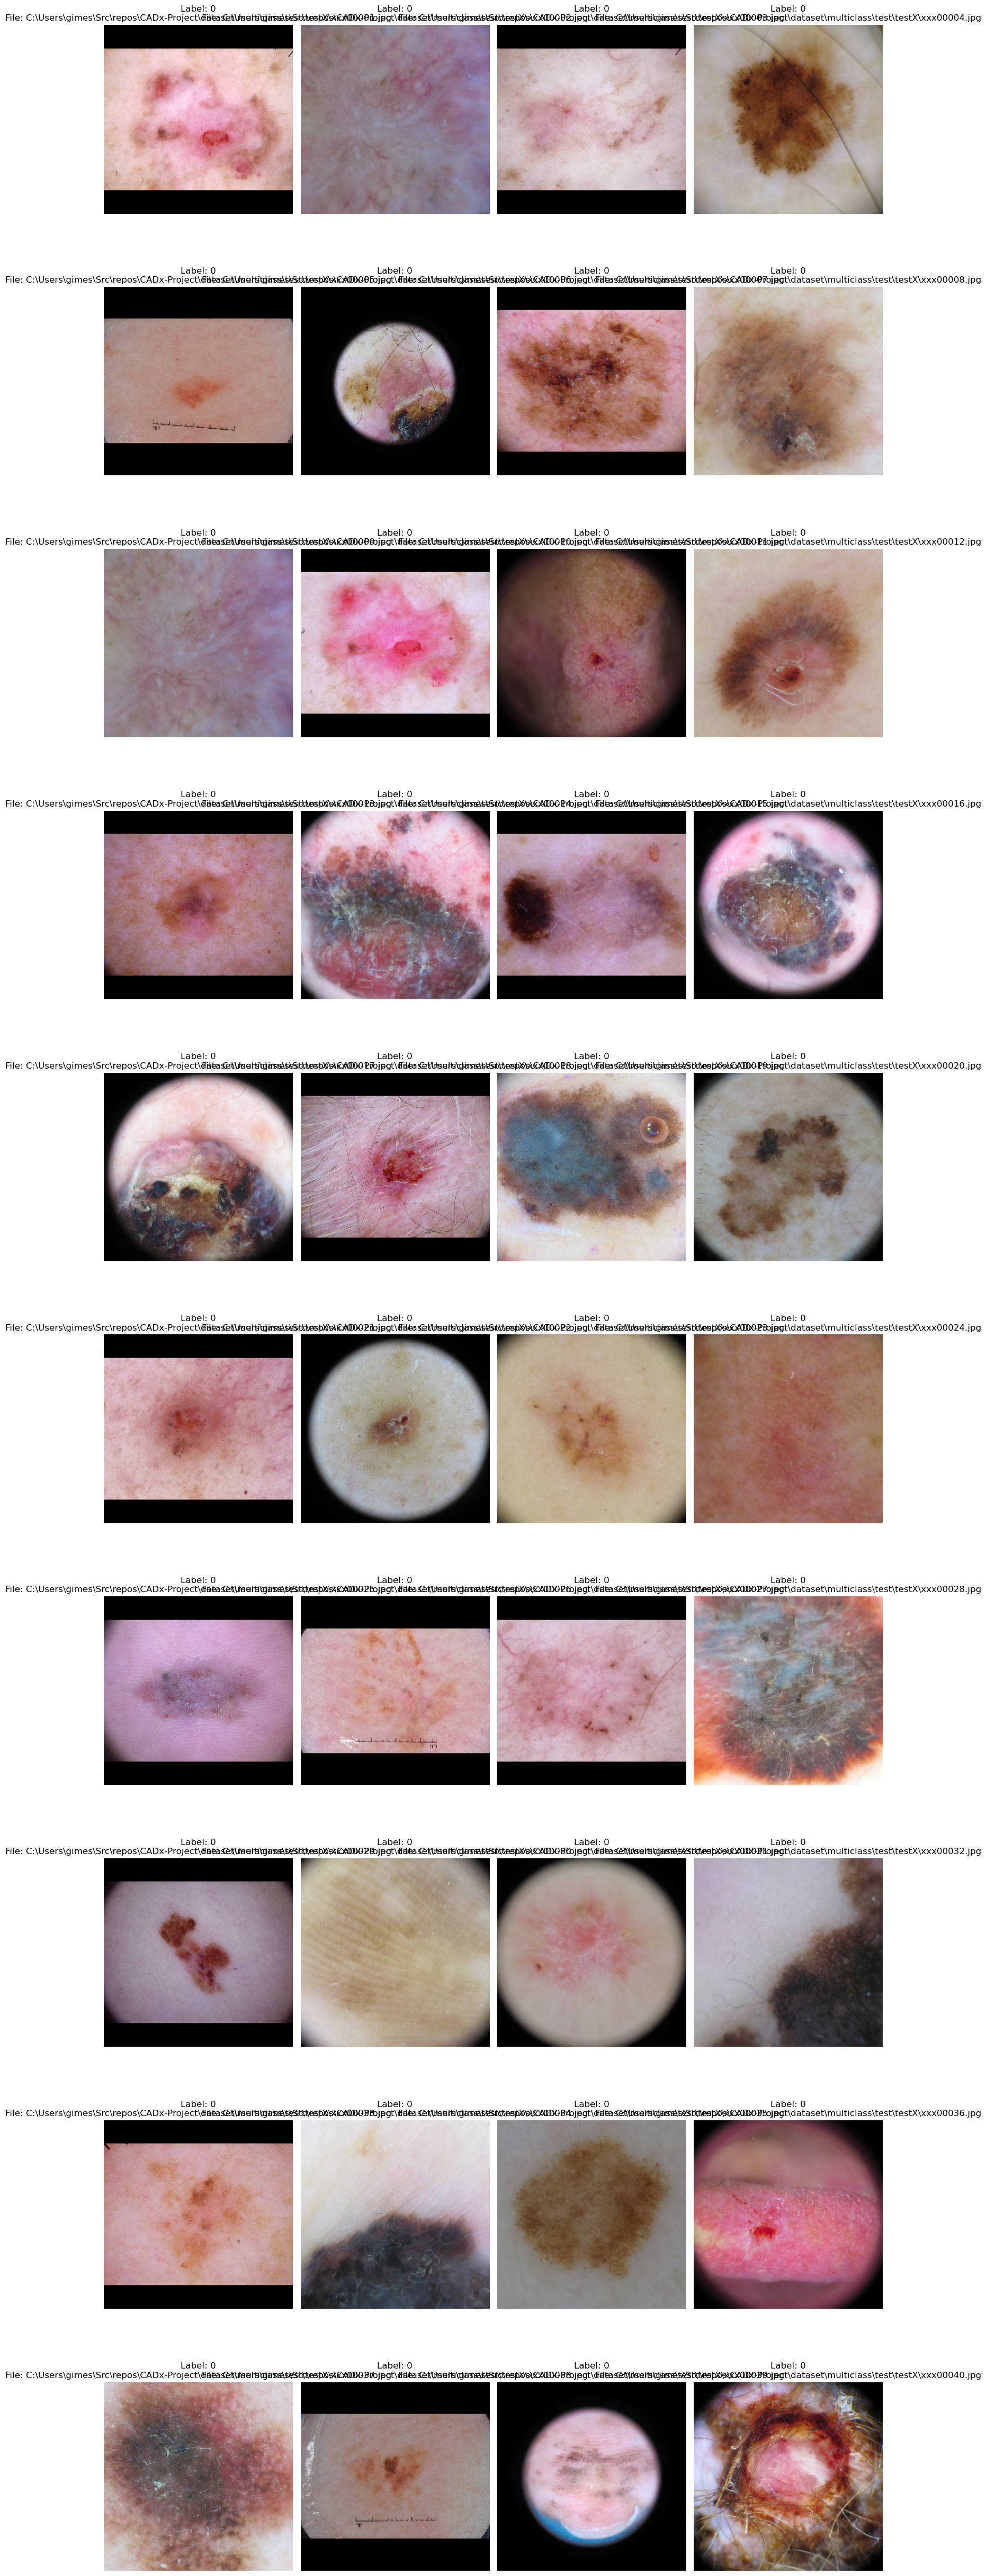

In [45]:
test_loader.show_images(40)

In [46]:
test_predictions = smote_classifiers["XGBClassifier14"].predict(test_feature_matrix)

np.histogram(test_predictions, bins=3)

(array([ 886, 1110,  125], dtype=int64),
 array([0.        , 0.66666667, 1.33333333, 2.        ]))

In [38]:
test_predictions = smote_classifiers["XGBClassifier14"].predict(test_feature_matrix)

np.histogram(test_predictions, bins=3)

(array([ 886, 1110,  125], dtype=int64),
 array([0.        , 0.66666667, 1.33333333, 2.        ]))

In [74]:
result = pd.DataFrame(data=test_predictions.reshape(-1,1), columns=["class"])
result.to_excel("multiclass_results04_11.xlsx", index=False, header=False)

In [53]:
feature_importances_df = pd.DataFrame(data=smote_classifiers["XGBClassifier14"].feature_importances_, index=strategy.get_feature_names())

In [56]:
feature_importances_df
result.shape

(2121, 1)

___
# CROSSVAL combined data

In [135]:
df_smote

accuracy  precision    recall        f1     kappa
GT               1.000000   1.000000  1.000000  1.000000  1.000000
XGBClassifier0   0.877165   0.785108  0.774303  0.779427  0.777964
XGBClassifier1   0.874016   0.783644  0.775213  0.779210  0.772786
XGBClassifier2   0.880315   0.795300  0.783800  0.789114  0.784126
XGBClassifier3   0.884252   0.804822  0.794888  0.799636  0.791037
XGBClassifier4   0.881102   0.799390  0.789689  0.794324  0.785351
XGBClassifier5   0.877953   0.790637  0.778026  0.783958  0.779332
XGBClassifier6   0.874803   0.782622  0.772650  0.777352  0.774013
XGBClassifier7   0.887402   0.807889  0.791279  0.798954  0.796314
XGBClassifier8   0.877165   0.790130  0.774480  0.781713  0.777707
XGBClassifier9   0.875591   0.784796  0.773319  0.778675  0.775378
XGBClassifier10  0.888976   0.813134  0.792795  0.802020  0.799021
XGBClassifier11  0.883465   0.808506  0.791698  0.799454  0.789277
XGBClassifier12  0.875591   0.785532  0.773497  0.779148  0.775152
XGBClassifier13  0.875591   0.784796  0.773319  0.778675  0.775378
XGBClassifier14  0.888976   0.813134  0.792795  0.802020  0.799021
XGBClassifier15  0.883465   0.808506  0.791698  0.799454  0.789277
XGBClassifier16  0.875591   0.785532  0.773497  0.779148  0.775152

In [65]:
val_loader = FactoryLoader(VAL_PATH, pipeline.batch_size, factory, shuffle=False)

# test_loader.show_images(100)

val_feature_matrix, val_labels = pipeline.feature_strategy.run(val_loader.get_loader())


Processed 5/53 batches.


KeyboardInterrupt: 

array([0, 0, 0, ..., 2, 2, 2])

In [98]:
print(pipeline.backup_feature_matrix.shape)
print(pipeline.backup_labels.shape)

combined_feature_matrix = np.vstack([pipeline.backup_feature_matrix, val_feature_matrix])
combined_labels = np.hstack([pipeline.backup_labels, val_labels])

print(combined_feature_matrix.shape)
print(combined_labels.shape)

smote = SMOTE(random_state=42)
new_combined_feature_matrix, new_combined_labels = smote.fit_resample(np.nan_to_num(combined_feature_matrix), combined_labels)


print(new_combined_feature_matrix.shape)
print(new_combined_labels.shape)

(5082, 519)
(5082,)
(6352, 519)
(6352,)
(10173, 519)
(10173,)


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the kappa scorer
kappa_scorer = make_scorer(cohen_kappa_score)

clf_key = "XGBClassifier10"
clf = smote_classifiers[clf_key]

print(f"Kappa: {cohen_kappa_score(pipeline.predictions['GT'], smote_predictions[clf_key])}")

# Perform cross-validation using kappa score
kappa_scores = cross_val_score(clf, new_combined_feature_matrix, new_combined_labels, cv=10, scoring=kappa_scorer, verbose=2)

# Display the results
print("Cross-validation Kappa scores:", kappa_scores)
print("Average Kappa score:", np.mean(kappa_scores))

Kappa: 0.7990208622338348
[CV] END .................................................... total time= 1.9min
[CV] END .................................................... total time=  54.6s
[CV] END .................................................... total time=  39.0s
[CV] END .................................................... total time=  40.1s
[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time= 1.7min
[CV] END .................................................... total time= 2.1min
[CV] END .................................................... total time= 2.1min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time= 2.0min
Cross-validation Kappa scores: [0.82308274 0.87837764 0.89681111 0.8765374  0.89680574 0.90786415
 0.9004881  0.896802   0.91522926 0.91697417]
Average Kappa score:

# COMBINED DATASET FOR BEST CLASSIFIER

In [93]:
final_clf = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1) # this
final_clf.fit(new_combined_feature_matrix, new_combined_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [94]:
final_predictions = final_clf.predict(test_feature_matrix)
final_predictions

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(result,final_predictions)

0.9434229137199435

In [97]:
final_result = pd.DataFrame(data=final_predictions.reshape(-1, 1), columns=["class"])
final_result.to_excel("multiclass_results_final.xlsx", index=False, header=False)

In [96]:
final_predictions.shape

(2121,)

# ANALYZE FEATURE IMPORTANCES

In [136]:
df_feature_importance = pd.DataFrame(data=final_clf.feature_importances_, index=pipeline.get_feature_names(), columns=["importance"])

filtered = df_feature_importance[df_feature_importance.index.str.contains("color")]
filtered
df_feature_importance.sort_values("importance", ascending=False)

importance
color_moments_rgb_B_iqr       0.028638
color_moments_lab_L_iqr       0.016987
color_moments_lab_B_var       0.011731
lbp_rad1_bins8_4              0.010535
color_moments_hsv_H_median    0.010109
...                                ...
fft_radial_variance_121       0.000000
fft_radial_variance_122       0.000000
fft_radial_variance_123       0.000000
fft_radial_variance_124       0.000000
fft_radial_variance_109       0.000000

[519 rows x 1 columns]

0.0024593433


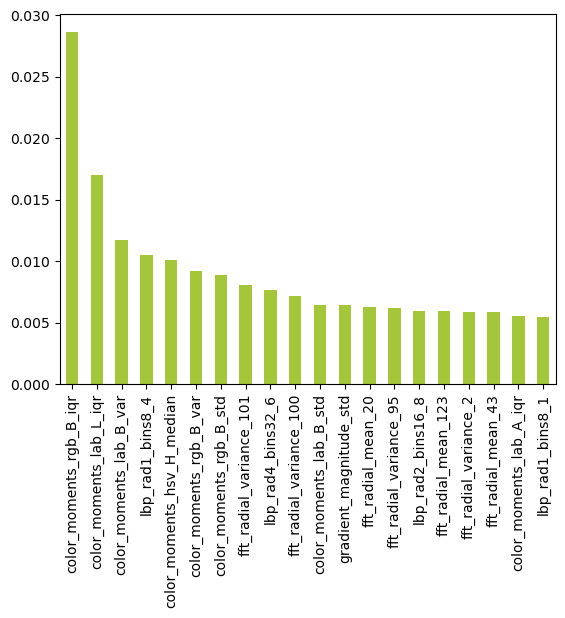

In [134]:
from matplotlib import pyplot as plt

feature_rows = df_feature_importance[df_feature_importance.index.str.contains("glcm")]
# 
# feature_rows = pd.concat([
#     df_feature_importance[df_feature_importance.index.str.contains("color")],
#     feature_rows,])

# PLOTTING
# Define MAIA logo colors
lime_green = '#A4C639'
dark_lime_green = '#7A9A01'
dark_gray = '#4A4A4A'


plot_df = df_feature_importance.sort_values("importance", ascending=False).head(20)
filetered_rows_mean = feature_rows.importance.mean()
print(filetered_rows_mean)


# Plot with MAIA colors and rotated x-axis labels, ensuring all labels show
ax = plot_df.plot(kind='bar', color=[lime_green, dark_gray], legend=False)
plt.xticks(rotation=90)
# plt.axhline(filetered_rows_mean, color=dark_gray)

custom_labels = [f"Mean importance: {filetered_rows_mean:.5f})"]
# plt.legend(custom_labels, loc='upper right')

# Ensure all labels show by setting ticks to match index positions
ax.set_xticks(range(len(plot_df)))
ax.set_xticklabels(plot_df.index)

pass

# ROC

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming `pipeline.labels` contains all possible classes [0, 1, 2]
n_classes = 3
val_labels_binarized = label_binarize(val_labels, classes=[0, 1, 2])

# Fit the classifier and get predicted probabilities
pipeline.fitted_classifiers[idx].fit(pipeline.feature_matrix, pipeline.labels)
y_score = pipeline.fitted_classifiers[idx].predict_proba(val_feature_matrix)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       498
           1       0.94      0.93      0.93       678
           2       0.60      0.55      0.58        94

    accuracy                           0.89      1270
   macro avg       0.80      0.79      0.80      1270
weighted avg       0.88      0.89      0.88      1270



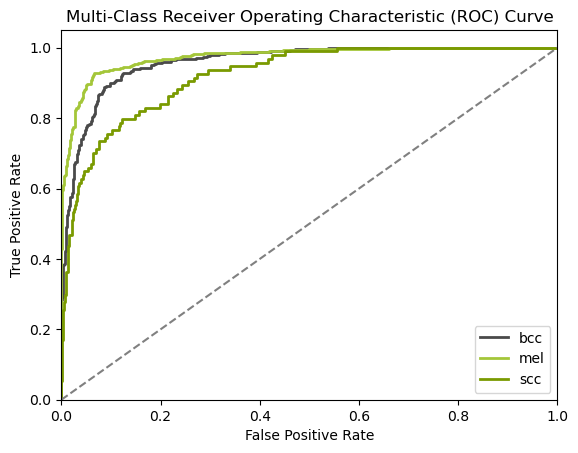

In [146]:
from sklearn.metrics import roc_curve, auc, classification_report
y_pred = pipeline.fitted_classifiers[idx].predict(val_feature_matrix)
print(classification_report(val_labels, y_pred))
# Plot ROC curve for each class
plt.figure()
colors = [dark_gray, lime_green, dark_lime_green]  # Choose different colors for each class

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(val_labels_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal for random performance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(["bcc", "mel", "scc"],loc="lower right")
plt.show()
